Take Home Assignment 02: Liquid Level

1. Analyzing the liquid level of a vessel will be studied in this assignment
2. How to utilize background subtraction is demonstrated in the notebook
3. How to use subsequent thresholding and contour analysis is also demonstrated
4. The student's task is to implement the demonstrated techniques to obtain a liquid level plot for the entirety of the video

Notes:
It is advised to go over the opencv documentation for the following functions

cv2.threshold  :  https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html




Student has to deliver:
1. Plot of the liquid level.
2. A brief note on what the student understood by reading the section on Otsu's threholding method.
3. 2 examples of probable erroraneous liquid level readings, when using Otsu's method. Show with annoted images.
4. A brief description on the final algorithm developed by the student.


In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

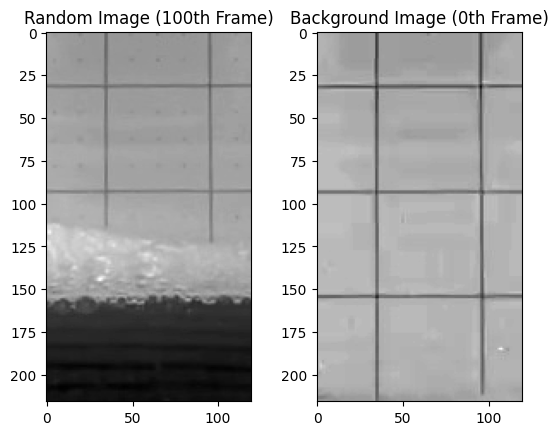

In [ ]:
# Importing Demo Images
img_r = cv2.imread('demo2_images/liquid_frame100.jpg', 0)
img_b = cv2.imread('demo2_images/liquid_frame000.jpg', 0)

# Display the images
plt.subplot(121), plt.imshow(img_r, cmap='gray'), plt.title('Random Image (100th Frame)')
plt.subplot(122), plt.imshow(img_b, cmap='gray'), plt.title('Background Image (0th Frame)')
plt.show()

Method 1 : Background Subtraction

Threshold Value: 50.0
Contour 0 Area: 6826.0
Contour 1 Area: 0.0
Contour 2 Area: 0.0
Largest Contour Size: 6826.0
Total Area: 25920
Percentage: 26.3 %


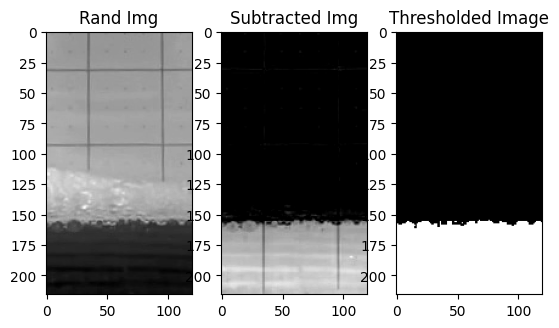

In [ ]:
# Subtracting the images
img_sub = cv2.subtract(img_b, img_r)

# Thresholding the image, to obtain binary image
ret, img_sub_thresh = cv2.threshold(img_sub, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
# Print the used threshold value
print('Threshold Value:', ret)

# Find contours in the image
contours, hierarchy = cv2.findContours(img_sub_thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Sort the contours by size in descending order
contours = sorted(contours, key=lambda x: cv2.contourArea(x), reverse=True)
# Print the contour areas
for i in range(len(contours)):
    print('Contour', i, 'Area:', cv2.contourArea(contours[i]))

# Find the area of the whole image
rows, cols = img_sub_thresh.shape
total_area = rows * cols
print('Total Area:', total_area)

# Calculate the percentage of the largest contour area, rounded to 1 decimal point
percentage = round((cv2.contourArea(contours[0]) / total_area) * 100, 1)
print('Percentage:', percentage, '%')

# Display img_r , img_sub, img_sub_thresh side by side using plt
plt.subplot(131), plt.imshow(img_r, cmap='gray'), plt.title('Rand Img')
plt.subplot(132), plt.imshow(img_sub, cmap='gray'), plt.title('Subtracted Img')
plt.subplot(133), plt.imshow(img_sub_thresh, cmap='gray'), plt.title('Thresholded Image')
plt.show()

How to read video files

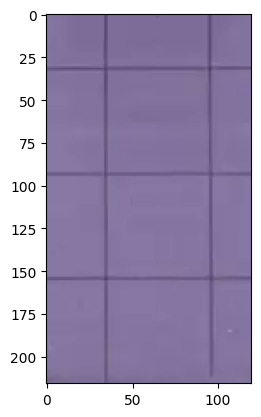

True

In [ ]:
# Reading frames from a video
cap = cv2.VideoCapture('demo2_images/liquidVideo.mp4')
ret, frame1 = cap.read()

# Displaying the first frame using plt
plt.imshow(frame1)
plt.show()



Answer

01.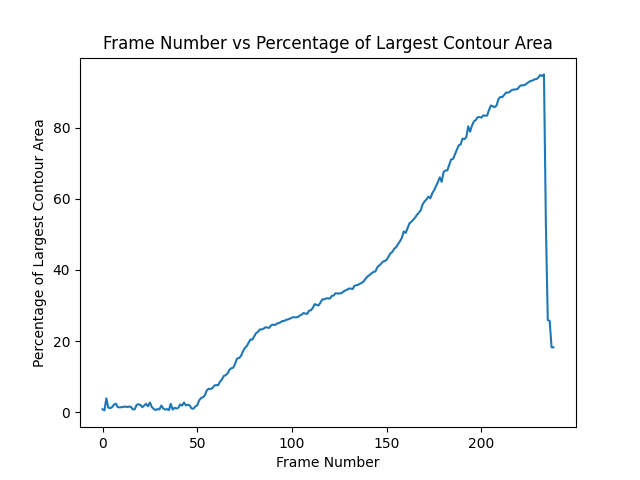

02.

Otsu's thresholding is an adaptive binarization technique that automatically determines the optimal threshold value by minimizing the intra-class variance (the variance within the foreground and background). Instead of manually specifying a threshold value, Otsu's method evaluates the pixel intensity histogram and calculates the threshold where the separation between classes (foreground and background) is maximized. It is particularly effective for images with a bimodal histogram but may produce erroneous results if the image lacks clear intensity separation.

Examples of Probable Errors

  Example 1: Low Contrast Between Foreground and Background

    
  Example 2: Reflections or Noise in the Frame

03. 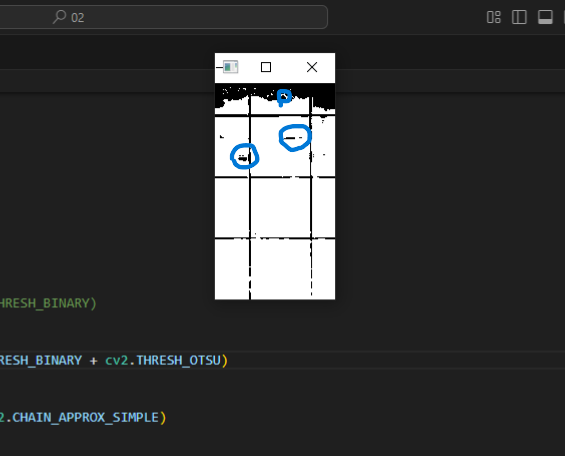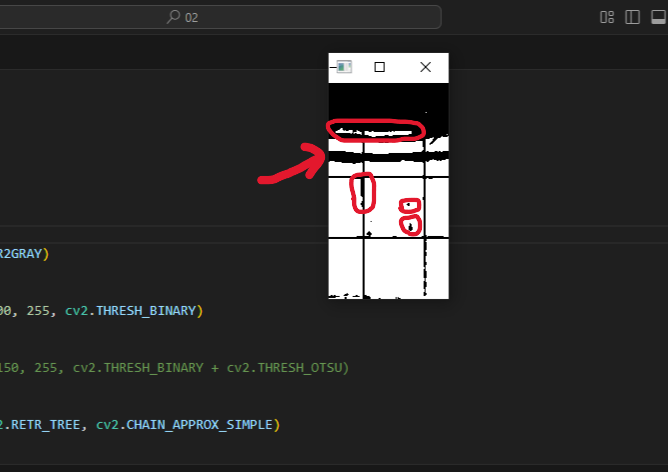

04.
**01.Initialization:**

    1.1 Load video using OpenCV and check accessibility.
    1.2 Use the first frame as the background for subtraction.

**02.Frame Processing (for each frame):**

    Perform background subtraction to isolate changes.
    Convert the result to grayscale.
    Apply Otsu’s thresholding for adaptive binarization.
    Detect contours and calculate the largest contour area.
    Compute the percentage of the frame occupied by the largest contour.

**03.Visualization:**

    Display the original, subtracted, and thresholded frames.
    Annotate frames to highlight potential errors (e.g., noise or reflections).

**04.Data Output:**

    Record liquid level percentages for each frame.
    Generate a plot showing liquid level trends over time.

**05.Error Analysis:**

    Save and annotate frames with potential detection errors (e.g., low contrast or reflections).

# **Code**

In [ ]:
import cv2
import matplotlib.pyplot as plt

def process_frame(frame, background):
    # Subtract the current frame from the background
    img_sub = cv2.subtract(background, frame)

    # Convert to grayscale
    img_sub_gray = cv2.cvtColor(img_sub, cv2.COLOR_BGR2GRAY)

    # Apply threshold
    #_, img_sub_thresh = cv2.threshold(img_sub_gray, 100, 255, cv2.THRESH_BINARY)

    # Apply Otsu's threshold
    _, img_sub_thresh = cv2.threshold(img_sub_gray, 150, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Find contours
    contours, _ = cv2.findContours(img_sub_thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Calculate the largest contour area percentage
    if contours:
        largest_contour_area = max(cv2.contourArea(c) for c in contours)
        frame_area = frame.shape[0] * frame.shape[1]
        percentage = (largest_contour_area / frame_area) * 100
    else:
        percentage = 0

    return img_sub, img_sub_thresh, percentage

def display_frames(frame, img_sub, img_sub_thresh):
    cv2.imshow('Original Frame', frame)
    cv2.imshow('Subtracted Frame', img_sub)
    cv2.imshow('Thresholded Frame', img_sub_thresh)

def process_video(video_path):
    # Open the video file
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print(f"Error: Unable to open video file {video_path}")
        return

    # Read the first frame as background
    ret, background = cap.read()
    if not ret:
        print("Error: Unable to read the first frame.")
        cap.release()
        return

    percentages = []

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        # Process the frame
        img_sub, img_sub_thresh, percentage = process_frame(frame, background)
        percentages.append(percentage)

        # Display the frames
        display_frames(frame, img_sub, img_sub_thresh)

        # Break the loop on pressing 'q'
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

    # Plot frame number vs percentage
    plt.plot(range(len(percentages)), percentages)
    plt.xlabel('Frame Number')
    plt.ylabel('Percentage of Largest Contour Area')
    plt.title('Frame Number vs Percentage of Largest Contour Area')
    plt.show()

# Call the function with the video path
video_path = 'f:/.semester 08/Machine Vision System/Assignment/02/ETM4272-main/demo2_images/liquidVideo.mp4'
process_video(video_path)
